In [3]:
import numpy as np
import pandas as pd
import colocationship as cl
import copy

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
df = pd.read_hdf('/scratch/share/datasets/a21/a21_checkins_30k_users.h5', key='table')

In [5]:
df_network = pd.read_hdf('/scratch/share/datasets/a21/a21_checkins_with_network.h5', key='table')

In [150]:
df_network.to_csv('a21_data.csv', index=False)

In [6]:
egolist = list(set(df_network['user_id'].tolist()))
alterlist = list(set(df_network['tgt'].tolist()))

In [7]:
print(len(egolist), len(alterlist))

35338 3534518


In [8]:
df_part = df_network[df_network['tgt'].isin(egolist)]

In [9]:
df_friend = df_part[['user_id', 'tgt']]

# Exclusive experiment

In [156]:
df_AB = pd.concat([df_A, df_B])[['userid_x', 'userid_y']]

In [167]:
df_call_info = df_AB.groupby(['userid_x', 'userid_y']).size().reset_index(name='N_call')

In [165]:
Shared_NSCL = non_social_co_locationship.network_details[non_social_co_locationship.network_details['userid_x'].isin(compare_v3.userlist)]

In [170]:
df_share_info = Shared_NSCL.merge(df_call_info, how='left', on=['userid_x', 'userid_y'])

In [175]:
df_share_exclusive = df_share_info.dropna(subset=['N_call'])

In [196]:
1- len(df_share_exclusive) / len(df_share_info)

0.8665786734086853

In [185]:
len(df_share_exclusive[df_share_exclusive['N_call']==1]) / len(df_share_info)

0.035730220107079116

In [186]:
len(df_share_exclusive[df_share_exclusive['N_call']==2]) / len(df_share_info)

0.021360053539559786

In [195]:
len(df_share_exclusive[df_share_exclusive['N_call']<=30]) / len(df_share_info)

0.13325401546698393

In [180]:
import matplotlib.pyplot as plt

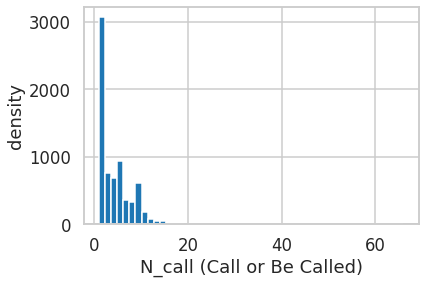

In [198]:
plt.hist(df_share_exclusive['N_call'], density=False, bins=50)  # density=False would make counts
plt.ylabel('density')
plt.xlabel('N_call (Call or Be Called)');

# What is Friendship Network (reciprocal friendships)

In [10]:
df_A = df_part.copy()
df_B = df_part.copy()

In [11]:
df_A = df_A.rename(columns={"user_id": "userid_x", "tgt": "userid_y"})
df_B = df_B.rename(columns={"user_id": "userid_y", "tgt": "userid_x"})

In [12]:
df_inner = pd.merge(df_A, df_B, on =['userid_x', 'userid_y'])

In [13]:
df_reciprocal = df_inner.groupby(by=['userid_x', 'userid_y']).size().reset_index(name='N_contact')

More than 30 reciprocal contact

In [14]:
df_reciprocal_valid  = df_reciprocal[df_reciprocal['N_contact']>=30]

In [15]:
len(set(df_reciprocal_valid['userid_x'].tolist()))

15172

In [16]:
df_friend  = df_reciprocal_valid[['userid_x', 'userid_y']]

In [18]:
# df_friend.to_csv('BZR_friend_reciprocal_30.csv', index=False)

# DF checkins

In [31]:
df_checkin = df_part[['user_id', 'lat', 'lon', 'location_id', 'created_at']].copy()

In [42]:
df_checkin.columns = ['userid', 'lat', 'lon', 'placeid', 'datetime']

In [43]:
df_checkin

,userid,lat,lon,placeid,datetime
2,0002D18309AF4230C09139D2FBB59E72,-22.70589,-43.29072,322,2014-01-09 12:03:14
3,0002D18309AF4230C09139D2FBB59E72,-22.70589,-43.29072,322,2014-01-09 12:21:56
6,0002D18309AF4230C09139D2FBB59E72,-22.70589,-43.29072,322,2014-01-09 16:25:26
7,0002D18309AF4230C09139D2FBB59E72,-22.70589,-43.29072,322,2014-01-09 16:31:49
11,0002D18309AF4230C09139D2FBB59E72,-22.72407,-43.31827,1169,2014-01-09 17:22:55
...,...,...,...,...,...
22116204,FFFE9D2D90DC0169BDD243FA2276D569,-22.88160,-43.57130,172,2014-06-23 11:56:29
22116205,FFFE9D2D90DC0169BDD243FA2276D569,-22.88160,-43.57130,172,2014-06-23 12:11:20
22116207,FFFE9D2D90DC0169BDD243FA2276D569,-22.87065,-43.55858,178,2014-06-23 12:15:46
22116219,FFFE9D2D90DC0169BDD243FA2276D569,-22.94383,-43.18235,963,2014-06-24 09:43:16


# Let's Focus on Main Results

In [44]:
co_locationship = cl.Co_Locationship(df_checkin, mins_records=150, missing='-')

In [45]:
print('There are', co_locationship.pdata['userid'].count(), 'valid check-ins records, \n'
      'There are', co_locationship.pdata['userid'].nunique(), 'valid users, \n'
      'There are', co_locationship.pdata['placeid'].nunique(), 'distinct placeid. \n'
     )

There are 1382626 valid check-ins records, 
There are 4415 valid users, 
There are 1816 distinct placeid. 



In [46]:
# First time, should run co_locationship
placeidT = co_locationship()

In [47]:
# cl.util.save_object(placeidT, 'BZR_placeidT_150.pickle')

In [48]:
# Run in the first time (it takes 30 mins)
cln = co_locationship.build_network(freq='H')
cln.to_csv('BZR_raw_meetup_150.csv', index=False)

In [49]:
print(co_locationship.network['userid_x'].nunique(), co_locationship.network['userid_y'].nunique())

4415 4415


In [50]:
# Run in the first time (it takes 6 hours)
cln_details = co_locationship.calculate_info()
cln_details.to_csv('BZR_CLN_CE_info_150.csv', index=False)

In [51]:
print(co_locationship.network_details['userid_x'].nunique(), 
      co_locationship.network_details['userid_y'].nunique())

4415 4415


In [52]:
cln_filtered = co_locationship.network_control(quality=True, 
                                contribution=True, 
                                num_alters=10, 
                                by=['userid_x', 'meetup', 'N_previous'], 
                                ascending=[True, False, True],
                                N_previous=150)

In [53]:
print(cln_filtered['userid_x'].nunique(), cln_filtered['userid_y'].nunique())

3608 4346


In [54]:
# Run in the first time (it takes 1 hour)
co_locationship.calculate_network(verbose=False, filesave=True, name='BZR')

# # The second time, you can just read the saved result
# co_locationship.network_details = pd.read_csv('BZR_CLN_network_details_H.csv')
# co_locationship.final_userlist = sorted(list(set(co_locationship.network_details['userid_x'].tolist())))

,userid_x,userid_y,meetup,N_previous,n_prev_match,CE_alter,Pi_alter,Rank,CCE_alters,Pi_alters,CCE_ego_alter,Pi_ego_alter,CCE_ego_alters,Pi_ego_alters,LZ_entropy,Pi,ODLR,CODLR
235,0002D18309AF4230C09139D2FBB59E72,EDBA2EEBAD0BD771EE6AF192584996D1,14,198,350,2.542571,0.649312,1,2.542571,0.649312,1.863818,0.765044,1.863818,0.765044,1.945826,0.751893,0.40,0.40
11,0002D18309AF4230C09139D2FBB59E72,0A5900898073025A1F432EF4653AFCEB,14,201,436,2.173451,0.714228,2,2.022642,0.739375,1.821687,0.771715,1.774596,0.779105,1.945826,0.751893,0.32,0.44
73,0002D18309AF4230C09139D2FBB59E72,5672F56621984155A125C65413703167,14,217,330,2.704780,0.619158,3,1.967648,0.748357,1.917357,0.756483,1.745602,0.783619,1.945826,0.751893,0.40,0.48
143,0002D18309AF4230C09139D2FBB59E72,9D8511DE05DD3AFA4EFEA50F95BDE8DA,12,161,439,2.074827,0.730760,4,1.823639,0.771407,1.818553,0.772209,1.692076,0.791883,1.945826,0.751893,0.32,0.52
90,0002D18309AF4230C09139D2FBB59E72,659BE695FD0B3BEAD95ABEF949E492BA,12,774,380,3.010154,0.559355,5,1.931896,0.754142,2.213912,0.707350,1.792025,0.776378,1.945826,0.751893,0.28,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,FFDDC356739ABE744793623DC6F4D06C,BAF7CA4E3E172453754B13AE8C6EE9A9,2,187,722,1.853208,0.766729,13,1.301202,0.849489,1.342017,0.843700,1.194281,0.864405,1.386503,0.837329,0.48,0.80
73,FFDDC356739ABE744793623DC6F4D06C,A240C07F9AB7E8694941EE525AD0EA88,2,286,203,4.378013,0.204562,14,1.300320,0.849614,1.385319,0.837499,1.193696,0.864486,1.386503,0.837329,0.12,0.80
54,FFDDC356739ABE744793623DC6F4D06C,737D826410C4CF848FE463EA134A099B,2,313,281,3.775493,0.386471,15,1.298767,0.849833,1.414110,0.833344,1.192803,0.864609,1.386503,0.837329,0.40,0.80
13,FFDDC356739ABE744793623DC6F4D06C,1FFE6122F30D1B13B719EA353E441A6E,2,394,308,3.731459,0.397613,16,1.301678,0.849422,1.443539,0.829069,1.195609,0.864222,1.386503,0.837329,0.32,0.80


# Social-Relationship Network Experiment

In [121]:
social_relationship = cl.Social_Relationship(df_checkin,df_friend, 
                                             mins_records=150, 
                                             missing='-')

In [122]:
srn = social_relationship.network
print('There are', srn['userid_x'].nunique(), 'valid egos \n' 
     'There are', srn['userid_y'].nunique(), 'valid alters \n' 
     'There are', len(set(srn['userid_x'].tolist() + srn['userid_y'].tolist())), 'total users \n' 
     )

There are 3992 valid egos 
There are 3992 valid alters 
There are 3992 total users 



In [123]:
# given the same time unit, we can just the placeid sequence generated by co-locationship
# otherwise, also run `social_relationship()` to generate placeid sequence again.
social_relationship.placeidT = placeidT

In [124]:
# Run in the first time (it takes 16 mins)
srn_details = social_relationship.calculate_info()
srn_details.to_csv('BZR_SRN_CE_info_reciprocal_30.csv', index=False)

# # The second time, you can just read the saved result
# social_relationship.network_details = pd.read_csv('BZR_SRN_CE_info_reciprocal_30.csv')

In [125]:
srn_filtered = social_relationship.network_control(
                                contribution=True, 
                                num_alters=10, 
                                by=['userid_x', 'meetup', 'N_previous'], 
                                ascending=[True, False, True],
                                N_previous=150,
                                freq='H')

In [127]:
print('There are', srn_filtered['userid_x'].nunique(), 'valid egos \n' 
     'There are', srn_filtered['userid_y'].nunique(), 'valid alters \n' 
     'There are', len(set(srn_filtered['userid_x'].tolist() + srn_filtered['userid_y'].tolist())), 'total users \n' 
     )

There are 488 valid egos 
There are 2085 valid alters 
There are 2096 total users 



In [126]:
# Run in the first time (it takes 28 hour)
social_relationship.calculate_network(verbose=False, filesave=True, name='BZR_reciprocal_30')

# # The second time, you can just read the saved result
# social_relationship.network_details = pd.read_csv('SRN_network_details_H.csv')
# social_relationship.final_userlist = sorted(list(set(social_relationship.network_details['userid_x'].tolist())))

,userid_x,userid_y,N_previous,n_prev_match,CE_alter,Pi_alter,meetup,Rank,CCE_alters,Pi_alters,CCE_ego_alter,Pi_ego_alter,CCE_ego_alters,Pi_ego_alters,LZ_entropy,Pi,ODLR,CODLR
377,00CE7F32CB6B7A3577EA93DE08496E27,15A83E1100CED2ADE6B3C0792F3448A7,1122,1967,2.532296,0.704874,84,1,2.532296,0.704874,2.067269,0.770289,2.067269,0.770289,2.363722,0.729108,0.520000,0.520000
378,00CE7F32CB6B7A3577EA93DE08496E27,15D4EF699C0FD3AF864017864B533900,1052,1642,2.869405,0.654571,81,2,2.435673,0.718838,2.217738,0.749614,2.055069,0.771945,2.363722,0.729108,0.440000,0.560000
412,00CE7F32CB6B7A3577EA93DE08496E27,D05BC58E69243459E909A8AB7ED65BD0,681,1485,2.909900,0.648357,55,3,2.200780,0.751967,2.251497,0.744911,1.990457,0.780665,2.363722,0.729108,0.560000,0.760000
418,00CE7F32CB6B7A3577EA93DE08496E27,FE813BF3D1D757442B86B7CD13A227A1,396,1286,2.943462,0.643179,48,4,2.139595,0.760409,2.186486,0.753946,1.950004,0.786080,2.363722,0.729108,0.500000,0.760000
383,00CE7F32CB6B7A3577EA93DE08496E27,26B9871EE3EF46E0FC3FF930E8DA760F,1087,876,4.360864,0.395797,41,5,2.145603,0.759583,2.446110,0.717339,1.966516,0.783874,2.363722,0.729108,0.280000,0.760000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121101,FF12018BE43C720B803F4A9CE9406B42,EF4B88EDEA7E9B76C2B609D9C8658D3B,375,267,5.038363,0.136845,10,7,2.717217,0.654332,2.372435,0.709313,2.201832,0.735361,2.472987,0.693608,0.162162,0.783784
121092,FF12018BE43C720B803F4A9CE9406B42,C3E8417F171F808A34CE5380E3A162DD,425,440,4.066451,0.401406,6,8,2.578667,0.676813,2.373413,0.709162,2.162452,0.741268,2.472987,0.693608,0.243243,0.783784
121100,FF12018BE43C720B803F4A9CE9406B42,DFA6B76B51736342A0B680C37EC09570,669,418,4.489931,0.302605,6,9,2.552227,0.681043,2.394422,0.705902,2.146290,0.743681,2.472987,0.693608,0.216216,0.783784
121095,FF12018BE43C720B803F4A9CE9406B42,D122CD55C471948888C8B23DCE6B057C,323,287,4.764857,0.228244,1,10,2.520572,0.686083,2.361235,0.711046,2.124294,0.746955,2.472987,0.693608,0.216216,0.783784


# Non-social co-location network

In [129]:
pair = []
for a,b in zip(df_friend.userid_x, df_friend.userid_y): 
     pair.append((a, b))

In [130]:
non_social_co_locationship = copy.deepcopy(co_locationship)

In [131]:
exclude_network = cln_filtered[~cln_filtered[['userid_x', 
                                              'userid_y']].apply(tuple, axis=1).isin(pair)]
non_social_co_locationship.network_details = exclude_network

In [132]:
non_social_cln_filtered = non_social_co_locationship.network_control(quality=True, 
                                                                    contribution=True, 
                                                                    num_alters=10, 
                                                                    by=['userid_x', 'meetup', 'N_previous'], 
                                                                    ascending=[True, False, True],
                                                                    N_previous=150)

In [133]:
print('There are', non_social_cln_filtered['userid_x'].nunique(), 'valid egos \n' 
     'There are', non_social_cln_filtered['userid_y'].nunique(), 'valid alters \n' 
     'There are', len(set(non_social_cln_filtered['userid_x'].tolist() + non_social_cln_filtered['userid_y'].tolist())), 'total users \n' 
     )

There are 3463 valid egos 
There are 4329 valid alters 
There are 4330 total users 



In [134]:
# Run in the first time (it takes 4 hour)
non_social_co_locationship.calculate_network(verbose=False, filesave=True, name='non_reciprocal_social_30')

,userid_x,userid_y,meetup,N_previous,n_prev_match,CE_alter,Pi_alter,Rank,CCE_alters,Pi_alters,CCE_ego_alter,Pi_ego_alter,CCE_ego_alters,Pi_ego_alters,LZ_entropy,Pi,ODLR,CODLR
11,0002D18309AF4230C09139D2FBB59E72,0A5900898073025A1F432EF4653AFCEB,14,201,436,2.173451,0.714228,1,2.173451,0.714228,1.821687,0.771715,1.821687,0.771715,1.945826,0.751893,0.32,0.32
143,0002D18309AF4230C09139D2FBB59E72,9D8511DE05DD3AFA4EFEA50F95BDE8DA,12,161,439,2.074827,0.730760,2,1.888434,0.761119,1.818553,0.772209,1.736135,0.785087,1.945826,0.751893,0.32,0.36
90,0002D18309AF4230C09139D2FBB59E72,659BE695FD0B3BEAD95ABEF949E492BA,12,774,380,3.010154,0.559355,3,2.068660,0.731783,2.213912,0.707350,1.883430,0.761919,1.945826,0.751893,0.28,0.52
123,0002D18309AF4230C09139D2FBB59E72,87E1A9F80264D1EA43DC9794714BC96C,11,503,225,3.927784,0.346334,4,2.073183,0.731033,2.139099,0.720024,1.900520,0.759185,1.945826,0.751893,0.44,0.60
67,0002D18309AF4230C09139D2FBB59E72,4E26219CBFFE91D73B2AED3AE62E3410,10,521,361,2.923875,0.576680,5,2.068713,0.731774,2.089216,0.728368,1.907393,0.758083,1.945826,0.751893,0.40,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,FFDDC356739ABE744793623DC6F4D06C,BAF7CA4E3E172453754B13AE8C6EE9A9,2,187,722,1.853208,0.766729,9,1.320113,0.846813,1.342017,0.843700,1.199884,0.863633,1.386503,0.837329,0.48,0.72
73,FFDDC356739ABE744793623DC6F4D06C,A240C07F9AB7E8694941EE525AD0EA88,2,286,203,4.378013,0.204562,10,1.321166,0.846664,1.385319,0.837499,1.200858,0.863498,1.386503,0.837329,0.12,0.72
54,FFDDC356739ABE744793623DC6F4D06C,737D826410C4CF848FE463EA134A099B,2,313,281,3.775493,0.386471,11,1.323816,0.846288,1.414110,0.833344,1.203300,0.863161,1.386503,0.837329,0.40,0.72
13,FFDDC356739ABE744793623DC6F4D06C,1FFE6122F30D1B13B719EA353E441A6E,2,394,308,3.731459,0.397613,12,1.333056,0.844975,1.443539,0.829069,1.211138,0.862078,1.386503,0.837329,0.32,0.72


# No_call_history_colocation network

In [200]:
call_pair = []
for a,b in zip(df_call_info.userid_x, df_call_info.userid_y): 
     call_pair.append((a, b))

In [201]:
non_call_co_locationship = copy.deepcopy(co_locationship)

In [203]:
exclude_call_network = cln_filtered[~cln_filtered[['userid_x', 
                                                   'userid_y']].apply(tuple, axis=1).isin(call_pair)]
non_call_co_locationship.network_details = exclude_call_network

In [204]:
non_call_cln_filtered = non_call_co_locationship.network_control(quality=True, 
                                                                    contribution=True, 
                                                                    num_alters=10, 
                                                                    by=['userid_x', 'meetup', 'N_previous'], 
                                                                    ascending=[True, False, True],
                                                                    N_previous=150)

In [205]:
print('There are', non_call_cln_filtered['userid_x'].nunique(), 'valid egos \n' 
     'There are', non_call_cln_filtered['userid_y'].nunique(), 'valid alters \n' 
     'There are', len(set(non_call_cln_filtered['userid_x'].tolist() + non_call_cln_filtered['userid_y'].tolist())), 'total users \n' 
     )

There are 3347 valid egos 
There are 4305 valid alters 
There are 4306 total users 



In [206]:
# Run in the first time (it takes XXX hour)
non_call_co_locationship.calculate_network(verbose=False, filesave=True, name='no_call')

,userid_x,userid_y,meetup,N_previous,n_prev_match,CE_alter,Pi_alter,Rank,CCE_alters,Pi_alters,CCE_ego_alter,Pi_ego_alter,CCE_ego_alters,Pi_ego_alters,LZ_entropy,Pi,ODLR,CODLR
11,0002D18309AF4230C09139D2FBB59E72,0A5900898073025A1F432EF4653AFCEB,14,201,436,2.173451,0.714228,1,2.173451,0.714228,1.821687,0.771715,1.821687,0.771715,1.945826,0.751893,0.32,0.32
90,0002D18309AF4230C09139D2FBB59E72,659BE695FD0B3BEAD95ABEF949E492BA,12,774,380,3.010154,0.559355,2,2.365451,0.681078,2.213912,0.707350,1.997088,0.743561,1.945826,0.751893,0.28,0.48
123,0002D18309AF4230C09139D2FBB59E72,87E1A9F80264D1EA43DC9794714BC96C,11,503,225,3.927784,0.346334,3,2.321956,0.688702,2.139099,0.720024,2.002115,0.742739,1.945826,0.751893,0.44,0.56
67,0002D18309AF4230C09139D2FBB59E72,4E26219CBFFE91D73B2AED3AE62E3410,10,521,361,2.923875,0.576680,4,2.236727,0.703446,2.089216,0.728368,1.996088,0.743724,1.945826,0.751893,0.40,0.64
49,0002D18309AF4230C09139D2FBB59E72,3B57ACCD63A7A12490F30D63580E4205,8,213,185,3.785168,0.383997,5,2.192516,0.710994,1.941393,0.752609,1.965752,0.748664,1.945826,0.751893,0.52,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,FFDDC356739ABE744793623DC6F4D06C,BAF7CA4E3E172453754B13AE8C6EE9A9,2,187,722,1.853208,0.766729,8,1.338028,0.844268,1.342017,0.843700,1.212027,0.861955,1.386503,0.837329,0.48,0.68
73,FFDDC356739ABE744793623DC6F4D06C,A240C07F9AB7E8694941EE525AD0EA88,2,286,203,4.378013,0.204562,9,1.338403,0.844214,1.385319,0.837499,1.212587,0.861877,1.386503,0.837329,0.12,0.68
54,FFDDC356739ABE744793623DC6F4D06C,737D826410C4CF848FE463EA134A099B,2,313,281,3.775493,0.386471,10,1.338656,0.844178,1.414110,0.833344,1.213348,0.861772,1.386503,0.837329,0.40,0.68
13,FFDDC356739ABE744793623DC6F4D06C,1FFE6122F30D1B13B719EA353E441A6E,2,394,308,3.731459,0.397613,11,1.346411,0.843073,1.443539,0.829069,1.220858,0.860732,1.386503,0.837329,0.32,0.68


# Comparison between social vs non-social

In [135]:
compare_v3 = cl.ComparisonNetwork([social_relationship, non_social_co_locationship], 
                                  ['social network', 'non-social co-location network'])

In [136]:
compare_v3()

There are 484 common users.


/home/zchen/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zchen/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/zchen/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/zchen/.local/lib/python3.6/site-packages/matplotlib/axes/_base.p

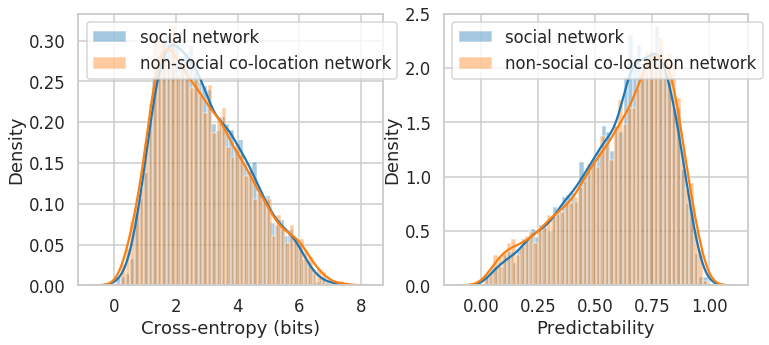

In [137]:
CE_v3 = compare_v3.plot_histogram(l=12,w=5)

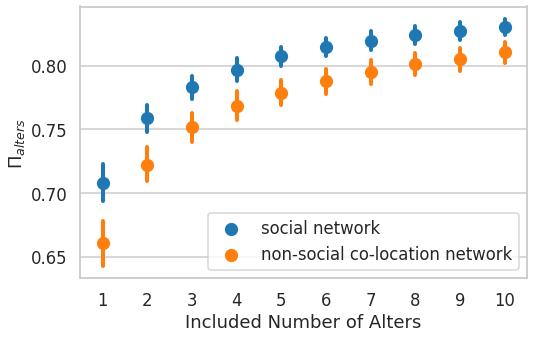

In [138]:
CCP_alters_errorbar_v3 = compare_v3.plot_errorbar(target='CCP alters', l=8,w=5)

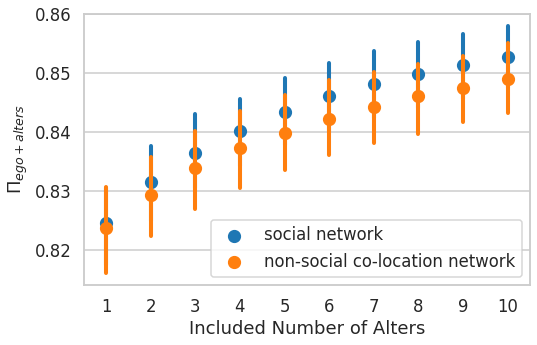

In [139]:
CCP_ego_alters_errorbar_v3 = compare_v3.plot_errorbar(target='CCP ego+alters', l=8,w=5)

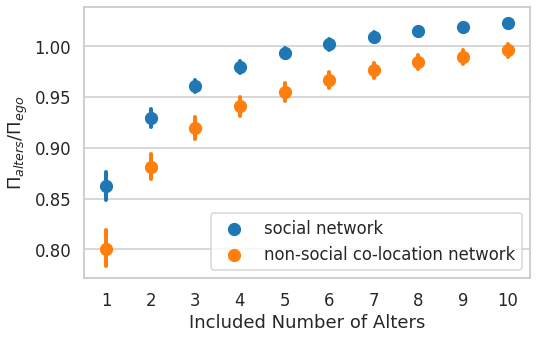

In [140]:
RCCP_alters_errorbar_v3 = compare_v3.plot_errorbar(target="RCCP alters", l=8,w=5)

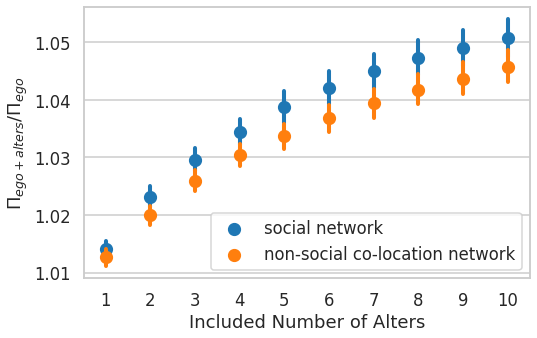

In [141]:
RCCP_ego_alters_errorbar_v3 = compare_v3.plot_errorbar(target='RCCP ego+alters', l=8,w=5)

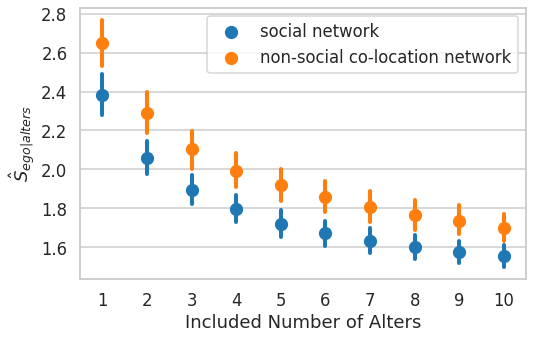

In [142]:
CCE_alters_errorbar_v3 = compare_v3.plot_errorbar(target='CCE alters', l=8,w=5)

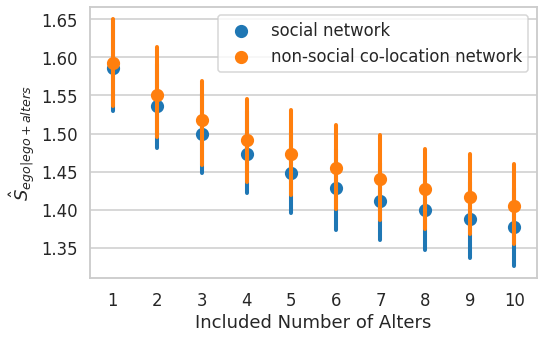

In [143]:
CCE_ego_alters_errorbar_v3 = compare_v3.plot_errorbar(target='CCE ego+alters', l=8,w=5)

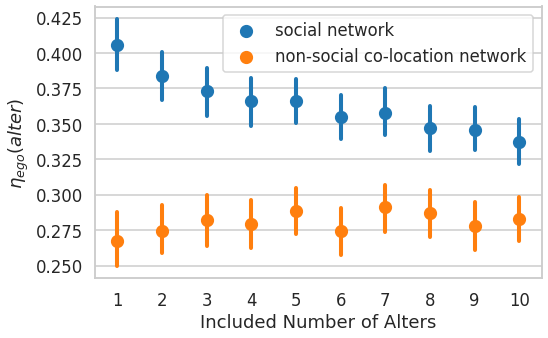

In [144]:
ODLR_errorbar_v3 = compare_v3.plot_errorbar(target='ODLR', l=8,w=5)

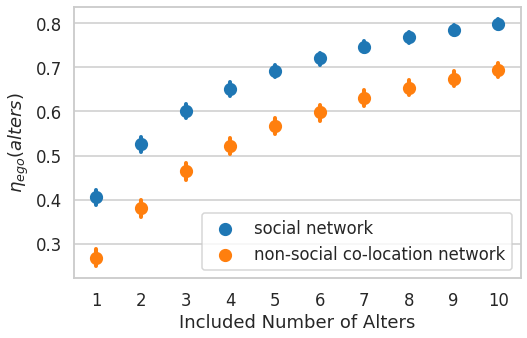

In [145]:
CODLR_errorbar_v3 = compare_v3.plot_errorbar(target='CODLR', l=8,w=5)

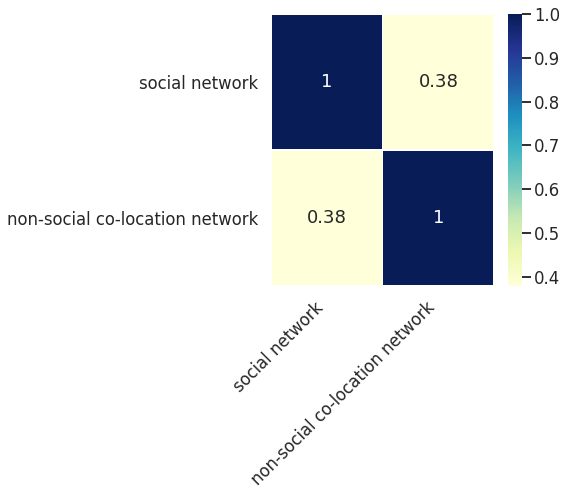

In [146]:
local_sim_v3 = compare_v3.plot_similarity(local=False, l=5,w=5)

In [147]:
compare_v3.statistics.to_csv('BZR_reciprocal_30_stats_non_social_vs_social.csv', index=False)

In [148]:
compare_v3.data.to_csv('BZR_reciprocal_30_common_top10_details.csv', index=False)

# Comparison between social vs no call colocationship

In [208]:
compare_v4 = cl.ComparisonNetwork([social_relationship, non_call_co_locationship], 
                                  ['social network', 'non-social co-location network']) 

In [209]:
compare_v4()

There are 483 common users.


/home/zchen/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zchen/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/zchen/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/zchen/.local/lib/python3.6/site-packages/matplotlib/axes/_base.p

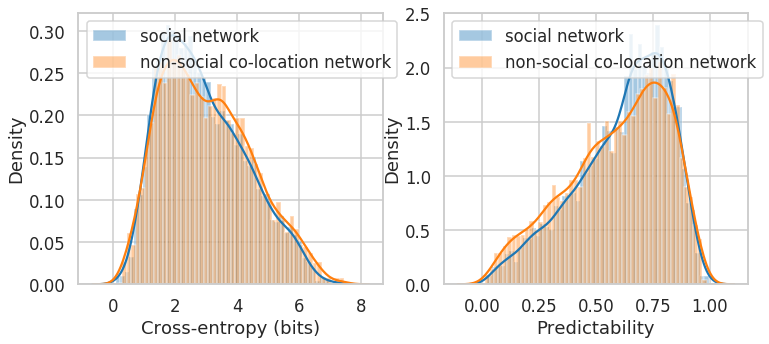

In [211]:
CE_v4 = compare_v4.plot_histogram(l=12,w=5)

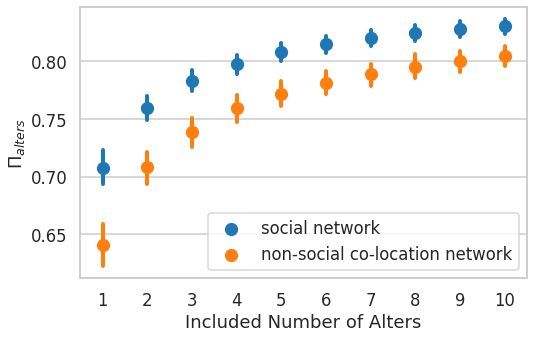

In [212]:
CCP_alters_errorbar_v4 = compare_v4.plot_errorbar(target='CCP alters', l=8,w=5)

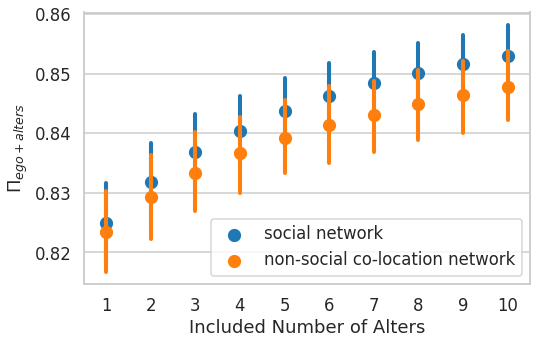

In [213]:
CCP_ego_alters_errorbar_v4 = compare_v4.plot_errorbar(target='CCP ego+alters', l=8,w=5)

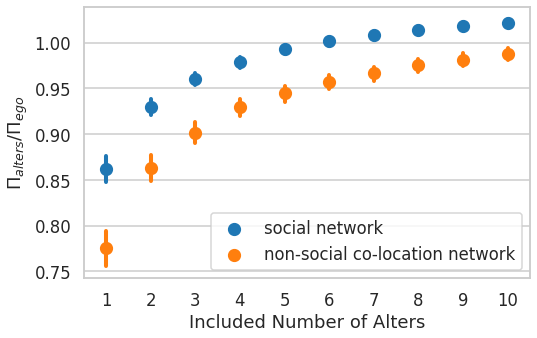

In [214]:
RCCP_alters_errorbar_v4 = compare_v4.plot_errorbar(target="RCCP alters", l=8,w=5)

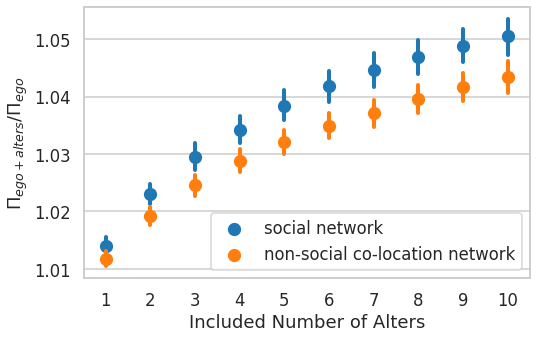

In [215]:
RCCP_ego_alters_errorbar_v4 = compare_v4.plot_errorbar(target='RCCP ego+alters', l=8,w=5)

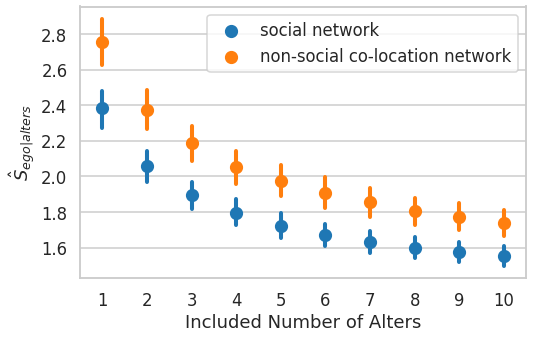

In [217]:
CCE_alters_errorbar_v4 = compare_v4.plot_errorbar(target='CCE alters', l=8,w=5)

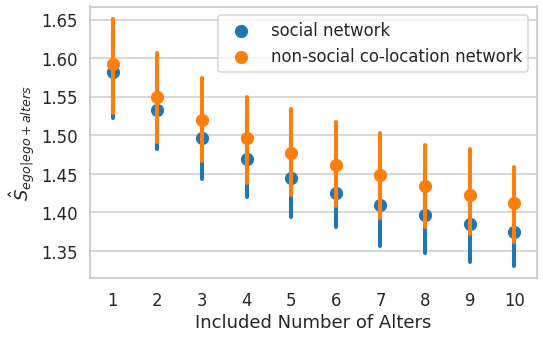

In [218]:
CCE_ego_alters_errorbar_v4 = compare_v4.plot_errorbar(target='CCE ego+alters', l=8,w=5)

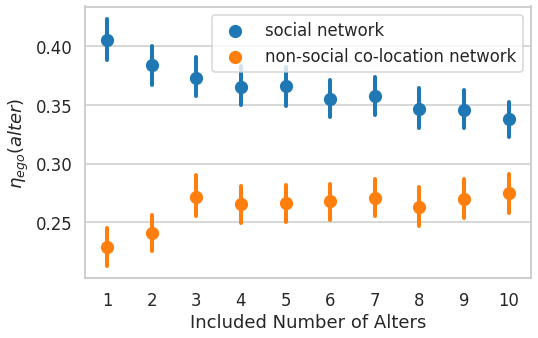

In [219]:
ODLR_errorbar_v4 = compare_v4.plot_errorbar(target='ODLR', l=8,w=5)

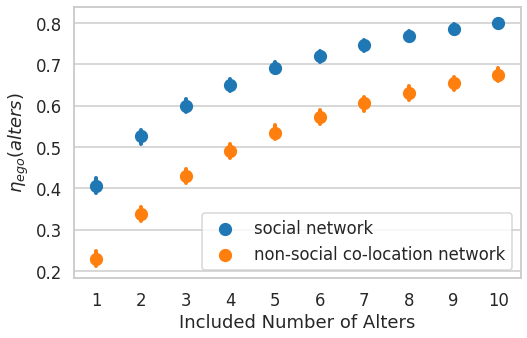

In [220]:
CODLR_errorbar_v4 = compare_v4.plot_errorbar(target='CODLR', l=8,w=5)

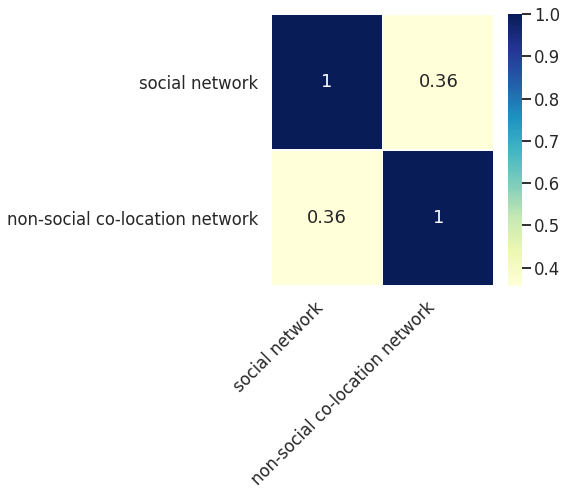

In [221]:
local_sim_v4 = compare_v4.plot_similarity(local=False, l=5,w=5)

In [222]:
compare_v4.statistics.to_csv('BZR_reciprocal_30_stats_no_call_history_vs_social.csv', index=False)

In [223]:
compare_v4.data.to_csv('BZR_reciprocal_30_no_call_common_top10_details.csv', index=False)

# Homophily on common egos in social network and no-call-history co-location network    

In [249]:
def predictability_user(x):
    seq = placeidT[x]['placeid'].tolist()
    S = cl.util.LZ_entropy(seq)
    N = len(set(seq))
    
    return cl.util.getPredictability(N, S)

In [252]:
top_rank_a_Pi = compare_v4.data[compare_v4.data['Rank'] == 1]

In [253]:
top_rank_a_Pi['a_Pi'] = top_rank_a_Pi['userid_y'].apply(lambda x: predictability_user(x))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [254]:
top_rank_a_Pi.to_csv('no_call/no_call_vs_social_predictability.csv',index=False)

# Homophily in social network and no-call-history co-location network separately

In [241]:
top_rank_a_Pi_SRN  =social_relationship.network_details[social_relationship.network_details['Rank']==1]

In [242]:
len(top_rank_a_Pi_SRN)

488

In [243]:
top_rank_a_Pi_non_call_CLN  =non_call_co_locationship.network_details[non_call_co_locationship.network_details['Rank']==1]

In [245]:
len(top_rank_a_Pi_non_call_CLN)

3347

In [247]:
top_rank_a_Pi_separate = pd.concat([top_rank_a_Pi_SRN, top_rank_a_Pi_non_call_CLN]) 

In [250]:
top_rank_a_Pi_separate['a_Pi'] = top_rank_a_Pi_separate['userid_y'].apply(lambda x: predictability_user(x))

In [251]:
top_rank_a_Pi_separate.to_csv('no_call/separate_no_call_vs_social_predictability.csv',index=False)

# Basic Info BZR

In [225]:
def basic_info(user):
    seq = placeidT[user]['placeid'].astype(str).values.tolist()
    shannon_entropy = cl.util.shannon_entropy(seq)
    LZ_entropy = cl.util.LZ_entropy(seq, e=2)
    N_unique = len(set(seq))
    shannon_Pi = cl.util.getPredictability(N=N_unique, S=shannon_entropy, e=2)
    LZ_Pi = cl.util.getPredictability(N=N_unique, S=LZ_entropy, e=2)
    return [user, shannon_entropy, shannon_Pi, LZ_entropy, LZ_Pi]

In [228]:
BZR_basic_list = [basic_info(user) for user in co_locationship.userlist]
BZR_basic_info = pd.DataFrame(BZR_basic_list, columns=['userid',
                                                     'Shannon Entropy',
                                                     'Shannon Pi',
                                                     'LZ Entropy',
                                                     'LZ Pi']
                             )

In [230]:
BZR_basic_info.to_csv('BZR-dataset-basic.csv', index=False)

# Compute the SW network

In [236]:
def network_sliding_windows(network, interval=1800, max_size=24):
    egolist = sorted(list(set(network['userid_x'].tolist())))
    
    network_time_pos = []
    for ego in egolist:
        ego_info = placeidT[ego]
        seq_ego_placeid = ego_info['placeid'].astype(str).values.tolist()
        seq_ego_time = ego_info.index.tolist()
        
        alterslist = network[network['userid_x'] == ego]['userid_y'].tolist()
        ego_df = pd.concat([time_position(seq_ego_time, 
                                       seq_ego_placeid, 
                                       alter, 
                                       interval=interval, 
                                       max_size=max_size) for alter in alterslist]
                          )
        ego_df.insert(0,'userid_x',ego)
        network_time_pos.append(ego_df)
        print(ego)
    
    network_time_pos = pd.concat(network_time_pos)
#     network_time_pos.to_csv('network_time_windows.csv', index=False)
    
    return network_time_pos

def time_position(seq_ego_time, seq_ego_placeid, alter, interval=1800, max_size=24):
    alter_info = placeidT[alter]
    seq_alter_placeid = alter_info['placeid'].astype(str).values.tolist()
    
    shared_placeid = list(set(seq_alter_placeid) & set(seq_ego_placeid))
    seq_alter_time = alter_info.index.tolist()

    container = []
    for t, w in zip(seq_ego_time, seq_ego_placeid):
        if w in shared_placeid:
            ids = cl.util.fast_indices(seq_alter_placeid, w)
            
            placeid_pos = pd.DataFrame([[w, time_diff(t, seq_alter_time[i], interval=interval, max_size=max_size)] 
                                        for i in ids], 
                                      columns=['placeid', 'time-pos'])
            container.append(placeid_pos)
    df_time_pos = pd.concat(container).groupby('time-pos',dropna=True).size().reset_index(name='meetup')    
    df_time_pos.insert(0,'userid_y',alter)
    
    return df_time_pos

def time_diff(a, b, interval=1800, max_size = 24):
    diff = (b - a).total_seconds()/ interval
    if (diff <=max_size) & (diff >= -max_size):
        return int_towards_infty(diff)
    
def int_towards_infty(x):
    if x >= 0 :
        return np.ceil(x)
    else:
        return np.floor(x)

In [238]:
total_network = network_sliding_windows(co_locationship.network, interval=1800, max_size=24)
total_network.to_csv('BZR_network_time_windows.csv', index=False)

0002D18309AF4230C09139D2FBB59E72
000666508374BD75CBD39B7355C95AC4
000C37842EC8CCCC501A9E40F53D0239
000CC8340F37807A6DAFA3ABE430CFFF
0015A0C9D14A4E3D0A9C6B69725619A7
001CD901ACFD275317421B3A1CBBE039
0072D75D498C60DCB18F3A6CBCA7CFEE
007E99026EB91A993EB73DFC83F58B1D
00863F8EE1A96861FF1A5B9674F8FF1E
00A185C4E9240A4C0B63784FFDE559AB
00AA601D55AF1DA362A6AC0AEBAE0602
00AB8C0EF923CB7FAF7B79B93E9E05B4
00C44509DD8A0CF234D8303B8C5DBF1F
00C79410AED0EE16874369FBF9FA73D1
00CDD90AB88364BDB6721658903A20CA
00CE7F32CB6B7A3577EA93DE08496E27
00E119C2C33081B5B9F34D1FE95E70A6
00E7AEE4CA06B481DEDF59A9BCD6219D
00FD19411E8C426F6785758674A6926F
0100A340059377AA6917FC55BFB6CE59
010E5C542EB02C7665A16C3EFB6A9B0F
011642B29BED1B0267D40777833289C3
011A5A4AC5BE3AF694402BC473B805EC
0123766B51B919D0AEA90E912D2296CE
0136525DBC39E6775FC05A5429D0F73A
0138A779D3833290866E6D77170636C2
014CAAE5942A153355E1FB1A3BE2592A
015307D44736886230AA1DDE15FEC06E
017B1E462341D4C373F5A82BA41DB164
01872AD5FF067B75C8B4B58512687227
018971815A

0C58B00502EA757AB275A235070DE277
0C70E57100FAC174928FB72D40E42F51
0C7DC29854B00B61DB858861CA0585A8
0C86C80FB363084963DF8B2C7E490F67
0C8D8CF1AE37B89BD86F1940A9E63F8E
0C927857BED2FBE93309CD338DF40DDF
0C9BA62E69E192E2A8A56715C12528D8
0CB0E83C3E6631D016822338BB42CEB4
0CB643C5E7333C395762E7E6BE4C9B8A
0CDC06DA2116A6BB5EB82E9C75299B38
0D04EDF464CC8B0E09B9A151272F983E
0D309164544F4412EE34FD1E6FCECB09
0D35A36080927682DCB0CA581327EBC1
0D6BBC8CECC17391791B1DC64CD2520C
0D705BFC007EE0A457AB50FC140C28D5
0D73757BA26282FAE05D36203D56B60A
0D8E4F26CEE3DC1A2C6A12B4070C21CF
0DA5174D608C24E7F460BD10501D0342
0DC587C3F0112EBD8E9A7D77DF051FBE
0DDC5190721C6A3D435794CC5BCAF2CD
0DDE7A47EF15B661DB8377B1204182BF
0DE6CDF6EE931BF1BE69566FEE43B10A
0DEB28206A28C012F3C4829840C4DE67
0DF8211562252B29F091526CA3B6BCB6
0E08EE18472C6A4BF227252C90C019B6
0E20066328BAB4CF18A78D56179BAC9B
0E35A9BB43DC239121CA84DBC1EEED8F
0E5CBF9252E56435843A4ABF753DE463
0E6439A6ACC17CDA91BD66AB68342503
0E82C772EBD7E30AA83246FC70E874F6
0E8B06E2E4

1B755C73A4D1F6A473814CE1B7F818F8
1B7EEC4C34B1FF72AB166D36AE361F20
1B7F8A42A202D482127FBD147FEFEEAC
1BA9302179AC6FD4066ED2A85084F365
1BB578C78DD6BF694CA7D8F2F4B1D5F6
1BB629DE27DF15E23EA2FBFE60192D02
1BC51852045A353925D954063507505A
1BCCC8F7FA3A26A164FAC9BFE3209066
1BCEF09422C436E9A91BC3F905BACD18
1BDC45F60AB40C94EF432047A828830F
1BE9A1E8A983367F22878DBBC1177F15
1BEB6539A61DD662BDDF51D08254B7CC
1BFBB93AD5780409D2405660584CC50E
1BFE991882E3652BD1886348DB6722B2
1C0DF29F7E30990CB87B9142A9124CA8
1C1390AD946012DF47A6562EF8C3523F
1C50AC4FA44E23F3431D34868F6631F7
1C866ADCEC8610AB59112781A60544A8
1C8CD686A1077E616369B135AB303F21
1CC0BA687581244C32DAC04059D5A7E1
1CDDB25259FF01A28A32BF3FDD8F41E6
1CE19EFF5D0814ED0AB09028B01FC1D4
1CEFB228A7989E5BFBDA3105288EBB04
1CF5E96C73CA2C794CC2B94A135DD8E0
1CFD15BE7DDCB4C734B5D18842200F33
1D037F23094CBF6BEE9EC45B6E6AA85A
1D050B702288C6FFA8DAC72AE217B457
1D05D91F79815C4B3A06D141498F06A8
1D076AD805BE1714B33160C8E3DBB0C8
1D152C859F71006B7BBCCC6026046D33
1D17CD5664

2A10C90D4E8D8208427F0DE98F87A77B
2A2EA0019D22951EC87ACA9DDB1E9A73
2A2EDAE19975C8FE3229E2DF031F449A
2A31D3C59AA1A3C18A4CB47299F71265
2A32E2B2F891D4F7A3DAC02FBB8A28D8
2A39E6233F1FC36E2ECC0E4B9E1D9A34
2A448C8964F56353A6F0BD2669F10CD5
2A4526D9EA551CC7F88726DBB2111CDF
2A4B92088CBDD922D692EAC26E3978AF
2A6BE1FDB3DC559D8D65F95B0E04DC6E
2AADB782614834D639DFA6AEA61086E7
2ADA69E49793DE0A14399E018BC982B3
2AF2CE72D951B365296ED4607D066906
2AF7E43C8B72958A11000F671CD56FE9
2AF823D7C13864C6AFE1B6ED7FF83840
2B10B2B3FE80F08152228A8742EA8A59
2B2C7637E834986244A2A9A6666B715F
2B4076D5774D63A8238BB0B379A5D23D
2B4F3B73393823AC4001C2AB9ECA6DB9
2B52EB7F750CA9E5C28EC4C651E38300
2B5CA2D11F6983EF772EAA16A14D4F77
2B65267C7B2833BCB4B20C49211A3D6F
2B6DB1FF96DCF8F11E6AAF8A9B49D054
2B748E9E418431F517B4803FCE51D0DF
2B7A2B013C19DDC0ED291DA1A091BB50
2B82A23BF516C3484EB8A4F083CBDBB0
2B889304B5CDD8FB79B3DCFEFDB94140
2B8BE2E109BD26AA624F85623A0B7860
2BA242FBDD1AE485E914EDD38D860B8B
2BAACB415B92823AB741A02079D4733A
2BADEDF816

38B943EBBBFBBA8E9D6443E54A24524F
38CC0119FD098A6D7F6264FA4E173DE5
39108D5CEBAAB099178CE86B5D8B0059
3918052B34B2E05257B5C4C741FF5C91
392A73B8D72E0C942CBCD067C033944E
39309E7FF1B649ABC565A31B539C8C34
394C3503A099DAEDEFE99569C02EB9BC
3960DB6158C46055EAEF1106B6F252A8
39690CCDC64BE6C9C477897B15B20BC4
398C11A71351D05FE5C38C74A6F106BF
39917CED296C7F1A3ECF186D234D842A
39955C190D4A22A1E733F38388E221BF
39A5E4819AF719CAA087B5AE53479BD9
39BC9C3F91FB0428B288C4B23F10B54E
39E6B313CE59696A4195F5F5E2255112
39F257D3B87D70FCB16B5B68C01D6AC4
3A0D49B77F0D67967A7CD1C5E040A211
3A1308367E3D9D0E10F971B331A124BC
3A2F51605D4AF43084030D01A08B98C2
3A426C69F7806272DE5C9DD8713E6B3D
3A46B7C3EEE813E020256F8EEB53B60A
3A58278716F21E2253A310E450263548
3A61492DF76D7BE0DD868B240086D9D9
3A661EE64498E0F64117CBDE44397024
3A72C36A8A3B6972F589A6F7F76488DC
3A84960F3DC2619496BC0A5570DBAE71
3A93197F7435B486990F25A5E51E2AAA
3AA8E355BC48AA8A530C06CF612A907F
3AABC745C65CC6E77C85871F96FCCA07
3AB2F3AED17ABC6C68D3022C29B6D5A6
3ABB23FD90

47931A26043B936E53C55046B0421E36
47A2911E956B1B62506A6682D12717D4
47A5A109019DE51A04DDE3EE6EBE83A5
47B6553D1802458D058EE704F513E107
47D209FD7852FA1C31714DE0192E64C3
47DF89EAB05773379AC1B30BBC1D96F9
480117CC46504671ACB89B1E8D388313
4804F45349F52A14D475CE10FE629D6D
481BC8D82D9AA8E7C3ACE52E84A10F9E
482257771BF3E618C6B95C51CE2018FB
482748A8413A6D580ECDBABADB7AEAAB
48593AB99E1798DDAC4497868EE329CE
4862658981E46F9496EE9D8F44688AAC
487A8B4A4FC7B420FBA8FA41E95098DA
487EA5C4CB4E936177F3296DB174EAD0
4885BFDB532968969898E1CC58D55DB0
48978613A99D272F0894F18AB58ADD8C
48AFDFD5C682C12CDE75C7DA04C97299
48B1B53BCDBB651EA7DC7EAFB73EB6D2
48B3E138EF6D954084AA09B88688C623
48C864C3D34DE9CB393A28717270B0F5
48CD2F25F1328AC9F918C2C9E087C42C
48D0BBA08EB6A82478F46656DEFB0C24
48D25F34925E3885D8066CEB8958016A
48D9F76BB52529F14AC07A50B9026B75
48DFF79E6552DE5A25E38706D0BA3450
48FF8DEF9378614C78623A442CF568E2
491A45238C585E5A6492BCC17A022BF7
4952BFF60C50363E07EBB4BB99E64C1B
495E2CC57864FA38EF570554B771AD78
497C792B6C

56F889F40D015CE4A6130B43F1A06C12
56F939020C06F2A380D8173531DD3CAF
56FC4682D3357AA2709DD261642CFA68
5709A91552A36117A1EDE8D7899E6D47
571406B0A01453919E9ED29D24E03A5C
571AF880882A50F099BDB8B1FD976DBA
57201CDDFCFF5C60C0562D7D809D162D
5727643339130EAC30BDDE06374B4A4C
5727A1AD8A223E0417CB80D6F0E47414
572DF06770EDE405AD2537D4A79018F9
5751B8EEEC31D98463A500D4D2B8E752
578522A07A7830DAE4D33B9278CE74DA
5786EFF443C8173CBC6638567CBA565D
579320F0E3EF5D0964199761868D63C5
57A0764518390E403C7BCEFC29A9C52B
57A48B68FAF567353DFC3C718246B3ED
57AFB8FD13D6C0EB60DE4652AE677387
57BBCEC7AC47DD3EB10A2A58C02D1C6D
57C3F9EE24F5928604B72A6B1DFD251C
57CEDC1BB20369E5CB1D09E35B9E1B61
57E25DEDA5CF4EB91B23BD877AF89266
57EC0E8AA50AF2E71EAE2E38A0246A74
57F4A97166707849C4B9F32A948A70AC
58028BC172A0DFF1FABF991183E0005D
580958968F8A04E5E7EEECD24C6DA511
581D942ECEC569BB931E20EDBE3CD7CF
582313EEB2341954EB1EC770BE32EBA7
583FF3421E565E9E253B7706ABEE3CAC
5856EE1E71D57DD5F61D27FEC83C71D3
587AF3CCB03B7AB71D7653224E458194
5887440EDC

65BDD5022668FF498EB9CBBB14157264
65BF320C1B81A1084AD699DFEBD55EEA
65CA9E5F9C3847318D01FD4CA1068AC4
65D8E85D4B04D70D30A718E7BFC9BA6F
6612775001C7C1C2C6E32F656AFFE4DD
661DD5E9B4F7D8473AA53C4CB75F1931
662CC039D34F944F82178BC402A4118C
662D383EF55DC8B2CDE95593FE2491EF
663738E71714D8C15DD7A5A0E16A0DEC
665300A4DFB4AE9D548B70451C054860
66548B4567AC98F151B65DD2D0A42961
6661FC12031E674CC99F0FC24A1E12F0
6664529CC4281799055DEEE5023F4C24
6669F3BC031651519A7EEF0C6192D0A6
667618B677CAAADC522927707018DA77
668341D3C230685FDF366BA6E705CEDC
668435E700FBB845F74F267355B614A9
6684DF288195BFEB1EDE18FD4C189224
6686A919F8DECB4724A686BE26BD6BF3
669302B1930E86AB7AAB6B62DA911101
66973E93D45E4CD40DA94A0624C6EBB5
66B00C7AB4FA933F053228A01DD90474
66B94A39B67E702A37ADFE66AA3E6484
66E1BA5590280C351AB52635CCBBCA1B
67082ADA5B7D8F70A3BBCD64E6AFCAF2
67245FECAC6EF0543DFF82A610222EB1
673DA3A636BE358E1ED9C55CDD535EF0
6741F5A18BD20A5D48813138C52454F2
674B6D43C74BAC96BA8CDC04420022E0
67518714304C82E793D2864559FB4D5A
67698C5B12

7409579494197EC43CAEFE04AB63D0DD
740B73F2A50CF8E539250C8EC78109B6
7412E2180D54608B1455DF57D97F8CBB
7419873A636DFAE92F74F4675F37466D
7441111EB27B9CB89705AACFB873B1B7
74412B7847313B9D02811AE0847FE80F
74545312AFCEC26E2AD4B329C97688EA
74763E7C10BD1220F17869C3304F4ABF
747AA52950337777C90F89A515067F67
747B96B6366775C2A860CADBA9C5B222
7483CF7C4A828F562454091ABAB28B6C
7488DE5129BDFF3D6314E61DB6EC6D54
749515BA078D07F0B0ECD3A90E0C00B2
749FF83FAAFA095647347D6D07B31DB0
74A2FBEC37F8B8C11FE08FF8231B2485
74E28BD21A1ED9BDB104F1B3DC7B33D7
74E6427F90DC76CB505FEA4F7EDFEF49
750526F3BAB69615BB92C0F56DBF25A6
7510B5ADE1010D273CD193EBF05C2FE8
75218B99B3F1372B36E5C4FEE2B5B799
75247ECDC7E2E9EB46C1CA60405CAEF6
752F4A63DE213F57E15A1A9AFC667C9F
7550BC00F308F834305BA20BF96E6E84
755F25F2AB49D6F3E7802DAD9D5D4C33
7560083E23A166206A51B919A410F67F
75679E53DF81925210EC2E7F30F5B079
7575C6E68FA901EFFE40FBFB2AB2FA7C
757CFF553256B301B446849A46F10CEF
7585B1B8CAAC027AD21E3564A1038D0F
7588178AE62EA155AEFAB2144D62D70C
758B788B75

810F8421E6240C9C0C63DA88D3DAAFFF
812D8FD1A8DE2885268B061885895AD7
813268603A502987C3AE3505D1B92726
8132F7CF6FF572E1D0293BF9995B62EA
8133A7A6D41D470F2B436A99ECB64E76
814E441CDB1EC3574B1C8F89EC9EBC2D
81594028024B73CE0B759672E4BAB56D
8173DAE7A3D3FFC3AA3C2E96CF513773
817E62143EA2D44BEA95620A3F9C74A0
81832D937C38E3FAC35BCE167323129D
81A3B584476DB5CCEE05C567F2925ADC
81A3F61B711CB2D94A6DB407F8460C66
81A93EE187839134C06DFF9877A1BE1E
81B2E5E0880A941A6E6027DB5AAA3FE1
81B59FE3F731A81D2BE49A6E84E89525
81CBF1BFB379906398298E948D762A56
81D0F06AE0C07ADDCA7A8BE33E88101C
81D2BFA6478CAD33E541E139731BB0BB
81E7641409B919A07C92ECCC58889405
82024FBA8E14DEF2DF40CD96E1948F30
820341AFE5BD41C1685256C99629E430
8207BDAA6F3748BCD2A888D09E691082
821A9F6F3962E279F3146C014EB1EF58
822CD10208674234EB627FB9F8903255
8240A1D0460F43C93AC9F505BB9D1C54
82421C004F933D6805073ACD18BE70E1
82577E2CFCFCC558106F3189ECD36210
825BADB574BAFEC713494366A07A5C6B
82612A327DDE1A08711A029338B3A15C
8271DE29D1A770B20BFD431F90345478
82774133D9

8FA2048AD1FDE709DBC3EA6894CF02A5
8FBFFC7081BDCABD96218F5CF2D6AB6D
8FC868139A2403F4DF2C2DFE076B25EA
8FD33F84A5662A08BD7725A1BFBF9BD6
8FD495115E56CAA544F1D479F6E86FD2
8FEFB0F0D7B5AD4CA5B6368354D61A60
8FFDA760520E8507D416C30C4C957ACA
9006A335B4AE91796A5D3EB57FAAF86C
900DB64A57B6B62BA18FF4D14447936E
90121CAC3A5A81C71FC65E541CF42390
901F1C82D57B923B6F378D96FC0F9A9A
902CAFB18738AEF6DACFF3A517C875E6
9046D97F921DBE94404A94FF535EE207
90493E69850544769D8B06E7CDADE70E
90503388B4C7CA2F2C4885A0D9193609
905729977B91FC3EDE12AD491186A8C6
9057786E92CF28F5CD88E8A389E9CC78
906DF32E944F278B55EABDC83C501255
9071DBCC03F6611C9BDA83899668494F
9075FEC1846A9C4CE7E603649BC7E308
909252592ABF643DB5EAC8DB295A638F
9094E46F0B6F3A0E1379283312762836
909B17B542333AFC56E306A1473F55D9
909C3133752FD6F9C4425ECF2BAC05DC
90A38277EA9577E67F1174264F16DCB8
90B2878636C18672AC36A21A78FC4D12
90CDE471BA5862F6907BC6A91D22EE55
90E18A4DB435F4314E26647CBAB762BB
90E5D25AF606AE83A9A8B0BE24E4FD6A
90E75FCD8D352DE959C388284C311495
91180B133C

9CB46C4914EB61BD9B2EEFA5C6225A7C
9CB49B7688B9892A1F2BF0DF553E8A2D
9CB6565F627D40AEF76C8D39A25C8C04
9CC83FA63AE92DB4F2BD535EE3FC93FA
9CFC5BA00AED910D593A0AFBE5431E3E
9CFDA6D2574413212B990106A6E92415
9D11F51DB7DD64B541597C383D0CB9F5
9D14153F234A9BC1A355D9578E0D8976
9D1AEC8C9C66335882E79ACB96DFFE09
9D38D4A741DD2DFE9538A3C41F062D03
9D393C3AEFB8F3E20FABE18CA555B299
9D3E6AEFD8099EAB90C8CF02EA40F200
9D46C64CF6E4BEE8081B2AD807B7608C
9D5CE6C466842769F959E79CDDE162C9
9D7D3D43CAD808EBC7D17F137BBB99E6
9D8511DE05DD3AFA4EFEA50F95BDE8DA
9DB9D3B9E86EDD2F2F851B7F456269BF
9DC153053ECECA707442547404FBE433
9DC1E077F1A985DD5E7FF20B2BC195FF
9DD36C36C53BB7A50CA72C0B7824DA3A
9DF5B06A9A63C901C183352EC6CDD231
9DF72265BF2617C6F1BF4B9161EF2066
9E0653575B1BFD38F1AC1957FFBE67DC
9E25862D096C10DCD24F1D9A9F6107CD
9E330919EB40BAC1658E9DEF5EAB7252
9E691DF801865D3DC4A500C44369B919
9E6E665EBD925CA94421CF8F27A8CA46
9E85AC72D4450FEAB7DBA69A3977EB6B
9E9D863CF79AC5547682557023ACEB2E
9EAA7547CC2001DBDB6379B1028AD98F
9EABCFA659

AA6F34E5E2A115EA47C87F1B2574D417
AA7222D8C231651280A064D4035E1B24
AA75FB4E8F46803B9B67910E3294845A
AA7D73F4429E43F4A34114DDBAD7C43D
AA818BC67CC8D61CD99866E4B8F6E454
AA86039EB11DF60C5C5C1CACFA08DA03
AA86CBAFCB67D425FF3E5D62A38BA463
AA8AC47CE9093C0761D31820A328E111
AAA533A0B4577673C58C70E22B83DC39
AAB35EA8384AD165EB8E2E9BC2D105C4
AABF0B490AEFA0DD7176C78E74E630F4
AACC5F3EFF51005871D74011538C610A
AACC85BA6FBC17251DA97127F909F303
AAD6C29889DBC88ACA6D7AD0F5EABF30
AAEC7B0997F3AF2F225B15372BAF2B73
AB1ACB125DE35BD5360D16035F688F42
AB1E33D717BA8E4158A90090ADA76D18
AB20D493508E7F90FFB16619C5E90915
AB2582B19FCCD83AB4AF6BC3F96424EA
AB2E149453B9B72F81BC07F6782721D0
AB3B1D4183AA1405C7262477845DFD01
AB4234DC1B403172F0BCFC14A62F0EA2
AB5BEAA56B4DE052EF8E433BA2F312F0
AB6902A0506F79849CB79744587B37ED
AB7A026DDDC32DFE6F17AF734E2056D7
AB890EFFC5E8FD034C4C4EC9F3A3FB66
AB8DC5A4EE62CA88E26373539AFB5323
AB9C31E7233B99F19E8832DDB8FD66D9
ABA470FC3C06BB1D9B04FAA7E480DB78
ABB0481FFB26B3DD1F37B0AEB5123885
ABB162FBF5

B793367EA9E344A17091889F89BE085B
B79F2E633D0AA0CDA259070F61CF2B0E
B79FB156288F721BEA491BBD8A247824
B7A3FE672E74A35E66CA91C67B79A46D
B7BEFA088F617F3BF9667FF767D68C00
B7CED8A949E134015A8B97ACAF6877B0
B7D387C9FB663E00B6029D2C9799546E
B7D5698C694D2F8DEDD7035AE8C8D9BA
B7E8FE3A1E099237FF3C886C824E6778
B82936BC22B0DD6912257A8068BE7DC2
B843982B4E47E873F841DA43096C4A11
B866111B346527F8B83444E0C1A91429
B86B2D42A360335CFC4F4E0AB2CF32D5
B8D1D83C8F7C6CF09EF659D5D772355A
B8E8949604B2F864993EE3A42B08F66A
B8EA2D0452D426E6350094A0EDCE9304
B91FD8CC0815FA9C1E0E1949C75CAAAF
B923590EF0888524E2EA4BC5F74AEEAF
B96C39C5852048B04705DDAD83DFF0EC
B97483C56B4967C8D621B8EA5DF09F81
B9756FA246BF30AB72EE7DB933255BB6
B977594D7A9467D3368258253615A01F
B97DA374642EC95748AB3970F4F63B7F
B9837ED4B5BF7E4454F0724398C4AA4A
B98678BEA63AC6EAD2DD31A5DBD73368
B999BF16233CFE43C5089FBC67269F55
B99D97E5C7C9E70DBA39603F4194A395
B9B25479C1877B9F603EBDD052C2BAB4
B9C7781A6CBD2B90042467B3E0CBA679
B9E37CBA6DB1A4112D5B966142816B28
B9E7FF64C2

C5EF1131FFD16FA82F63D49D2648FC23
C5F1D9D02EA90B33D16027645CDF339B
C622BC7DE7B7953C07DFD2D373B010F6
C64B3B93B5061E56316C26F791E352D9
C64BC232B2997EF02B5BA7E8F95E803F
C65053138D38314B62BE2DE9AC251FE6
C652F0F37A2033F95FEE7088F84F5A34
C658A3CFD5060FB944F737EE1BA63343
C668C4BE98FBA4F08F395349F1EB5830
C669CCB625C2A78352BEF3820944D555
C673783D198D21D6CE248DE1AF7456F1
C693546404EB440EAE10AB753481F5A1
C6C40A425435098B8A470BFAC473A593
C6D7135EBBB1E477B5B0FCF46EBFCA86
C6EED958B394DB1E8577B1081E8BAF60
C713A906BEEDED92593CDA10710A2EBF
C714ACA2F8DBF2939B8E64B489793B24
C72D956DB103F2124EBA6DDEFAEC64E3
C75E6C58B2275B8B0218297FC259F5AC
C7824D530FAD72F6FD3F8CD3072F88B2
C783F002872929709D47925DBE11880F
C789E30968D76C136D493AFD6CAB90A4
C79375F211B080F1F3096F1C357689BC
C79E52A7E7DA14582E560B7FF9ECB9E5
C7A4D524C1CBBAF78E4938FC9DAAC436
C7AD638BBB45DDCA029834E5A0D41E6F
C7C612D8E10E9D8F04CBD2898EC69BFA
C7C74D32C25BC81CD7A8CB458D0750BB
C7E7F84D05927143C156E9CC3C21F29E
C7F2AACB3F5EEA2B836FABF75CF8A5AA
C809DF5870

D6E396241B8B5CDA6A0380AB16E32995
D6E51F6968CDBFE959784100B76A8627
D706AAF175BA0A050188297A4E4A4779
D70D90C4641DA1304F15966CB7C32125
D71E298C7BD3DE40B3318537189DE33D
D7424592095AD2C684853178CAD95C11
D7479F4CFBAB16C845F9DAD8750EDE00
D7484866E7DA75C0292EF77809AE6FE6
D77C7B4CD52439F750BF9FFA898F728A
D77EB10AEABD6396950B978F5CFEA5E7
D78A74AFD63474BE30E23D03A822F965
D7954442AAEA9A5126D0D650D613E21D
D7B1D04FB7B98CFBC368422B7E20337E
D7BB30EFA128946CB8E0E56B1D772C7F
D7EC0792FC18E85EFD68B9C6E82B985F
D80FDA7858964B4CA0337F9B49471E2F
D825C6601AB20AE04DCC2C7C2E1AD25F
D842B58FD74BC2242B1F92E306412738
D85C02F863DD5A6709BCA9E8E6F1F353
D86444FFCB748C27B228B23D5366F6D5
D886E1B0BEDE180C97680035C8016D03
D88985467949489405CD6ABB3B07E5C2
D88CD1D523AAEE00C3C8AC708ECA123E
D88F4074002FDEBB53EA860C441478B8
D896E375CA2CFDEC266E6BE743654045
D8A171A015F6A77C6B67E5851397BD99
D8A448D5A5BDCAB710A436636E7F4A56
D8C3BE169AE5FD995B80C4B9A1C93BF1
D8CD47FA631EB5412F3A63B6734AC2EA
D8F0E74CFC63A3D528DD3E8F3AD7978F
D8FA2A8134

E6A426B34243AAF5483DFC971CA9C9D2
E6BAD6527F94584FAE620EFA1A11BA10
E6C1A11AD3F1A5526894170E2430BA87
E6CB2CC038B7C95571165052631DC21F
E6D6C5F8CD9917C3BB404BB39C15087D
E6D7212845F871FB5F731FEDA1A8CAE9
E6DFA0CA563ADCDD5F2D717891A03C3C
E6E603184C534D13A050CE1F3F6E17F3
E6F2BE5BA7ADCA7927E504E95C436B6B
E6F4299CE3D4AA54DA0B4B1270BC2B33
E6FB3A9BDD80DAEDAA9EFFF0545D3FD5
E705980FF3A76E562994D3895742B1F2
E70F38E038BEBF947623B0AE194AF0C1
E73183C9DDCFBACDA131F59B1212CBF3
E757730800E13F239288F5C0C0FB6B9C
E75E5AECCEC032826E9FEE80B17FB145
E790CF86445B8DA3DBA65185EF910422
E792A96E3935FF829413D67FD3A67C71
E7A7AED7524D19609ACDC812695AB12A
E7BF01B4C823B5FAC59C43C62DFD656E
E7C1285E339425DA85E7158FDAB92B2A
E7E9776CD74E99BEF6AF6874F035E204
E7F91FF4B32D884BD5208A4BA0222232
E81777E4D741DD87D5CA7CFFCF9A0E02
E81F218E7E9309208BC503580A1F8DD3
E8338B19EA2ED00AD427BED5DADBB5F8
E833A169992A38EDB0109162D065BDE5
E83D66A1D7FEC0AE7728230CF12DCCAA
E84C1E8F0D2FCD253434581EC395BE72
E8502B446D4DB7F2F1B06935225F81DF
E861661122

F5B808F3AFFF4C308993DE49BD3ECECF
F5B8CF7280CF590BC5C216AEF40978A7
F5D15D9D79D19712B257976FEE09B1C1
F5D3196968CB0B0E8682F9ABA67B9C33
F5D4C4762CCE110183A55BED3A408DB1
F5E8147469F5964EA80C20B1EBE88004
F5EEAEB8D02E6CD6151F195969F886C3
F5EF0EB85A9761E48662426F765FE648
F5F742EB009BCF00E7504156F88F609F
F5FF3DBA753A709F1C77265A951362DB
F5FF6A2718B3301725FD628CBF29EB34
F600FE993EFC47E00EA518F638FA7FBC
F604846BAE5D84F260D13CD1DC436E80
F626C81C238BDEF13DEBE86A8885D200
F6285D62AC278DE21D4A6A42B5FF8D1C
F64A59FCB5A50A03B78D561AEE052EDB
F65D568678B1EE85898290F7E956B244
F6870357C96838FFC61322C635490976
F6929FF7822382EA5ABB28C454FBF99D
F69461CCD3BE2CCCC881107E5609E673
F69810BFCE77F89132D0E2344CFE3FF9
F6A8B4A5008346DB5A9D2F5F78256707
F6C372470401864BE3F6F4CAA41FB966
F6D03ECCD479F857C424901E64FA4F66
F6D25F80869ECCC46B8BA5AE1420D1BB
F6D2CE1A2498F1F8861808E74988FE8A
F6E1A41B30122ADB3B438FE1ABBAA4EC
F6F36347933B0C1119CBB2982B14BD30
F6F4C04C43251FB43988A7B4A0AE8994
F70B912A3577E0287FD69BF06E9A8FC8
F70CCE66EC

# Building no_call SW1-Netowrk and Compute the details

In [260]:
no_call_SW1_CLN = copy.deepcopy(co_locationship)

In [257]:
SW_H1_Network = total_network[total_network['time-pos'].
                                  isin([-1,1])].groupby(['userid_x',
                                                             'userid_y'])['meetup'].sum().reset_index(name='meetup')

In [261]:
SW1_exclude_call_network = SW_H1_Network[~SW_H1_Network[['userid_x', 
                                                   'userid_y']].apply(tuple, axis=1).isin(call_pair)]
no_call_SW1_CLN.network = SW1_exclude_call_network

In [264]:
# it takes 6 hours
no_call_SW1_cln_details = no_call_SW1_CLN.calculate_info()
no_call_SW1_cln_details.to_csv('BZR_no_call_SW1_CLN_CE_info_150.csv', index=False)

# # The second time, you can just read the saved result
# no_call_SW1_CLN.network_details = pd.read_csv('BZR_no_call_SW1_CLN_CE_info_150.csv')

In [265]:
print(no_call_SW1_CLN.network_details['userid_x'].nunique(), 
      no_call_SW1_CLN.network_details['userid_y'].nunique())

4415 4415


In [266]:
no_call_SW1_cln_filtered = no_call_SW1_CLN.network_control(quality=True, 
                                contribution=True, 
                                num_alters=10, 
                                by=['userid_x', 'meetup', 'N_previous'], 
                                ascending=[True, False, True],
                                N_previous=150)

In [267]:
print(no_call_SW1_cln_filtered['userid_x'].nunique(), no_call_SW1_cln_filtered['userid_y'].nunique())

3477 4326


In [268]:
# Run in the first time (it takes 3 hour)
 no_call_SW1_CLN.calculate_network(verbose=False, filesave=True, name='SW1')

# # The second time, you can just read the saved result
# no_call_SW1_CLN.network_details = pd.read_csv('no_call_SW1_CLN_network_details_H.csv')
# no_call_SW1_CLN.final_userlist = sorted(list(set(no_call_SW1_CLN.network_details['userid_x'].tolist())))

,userid_x,userid_y,meetup,N_previous,n_prev_match,CE_alter,Pi_alter,Rank,CCE_alters,Pi_alters,CCE_ego_alter,Pi_ego_alter,CCE_ego_alters,Pi_ego_alters,LZ_entropy,Pi,ODLR,CODLR
131,0002D18309AF4230C09139D2FBB59E72,A4293E240B1874B41DB052DD0DD068A6,34,339,184,4.085345,0.301609,1,4.085345,0.301609,2.030021,0.738163,2.030021,0.738163,1.945826,0.751893,0.32,0.32
58,0002D18309AF4230C09139D2FBB59E72,4E26219CBFFE91D73B2AED3AE62E3410,32,521,361,2.923875,0.576680,2,2.770660,0.606604,2.089216,0.728368,2.073364,0.731003,1.945826,0.751893,0.40,0.40
9,0002D18309AF4230C09139D2FBB59E72,0A5900898073025A1F432EF4653AFCEB,29,201,436,2.173451,0.714228,3,2.190657,0.711310,1.821687,0.771715,1.922036,0.755730,1.945826,0.751893,0.32,0.48
106,0002D18309AF4230C09139D2FBB59E72,87E1A9F80264D1EA43DC9794714BC96C,29,503,225,3.927784,0.346334,4,2.192841,0.710939,2.139099,0.720024,1.940266,0.752791,1.945826,0.751893,0.44,0.64
78,0002D18309AF4230C09139D2FBB59E72,659BE695FD0B3BEAD95ABEF949E492BA,26,774,380,3.010154,0.559355,5,2.202267,0.709335,2.213912,0.707350,1.979860,0.746371,1.945826,0.751893,0.28,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032997,FFDDC356739ABE744793623DC6F4D06C,70AED96E6FF4A440EC2688510EC37BE6,2,240,513,2.484117,0.659926,15,1.345758,0.843166,1.358627,0.841328,1.224330,0.860250,1.386503,0.837329,0.64,0.72
1033037,FFDDC356739ABE744793623DC6F4D06C,DF847C0F82A4370F23557517A02810AE,2,267,204,4.314951,0.227698,16,1.342611,0.843615,1.395426,0.836043,1.221967,0.860578,1.386503,0.837329,0.24,0.72
1033046,FFDDC356739ABE744793623DC6F4D06C,F0E45B65559D134CE8177E9F57EBD25C,2,366,216,4.437227,0.181049,17,1.344784,0.843305,1.430519,0.830964,1.224058,0.860288,1.386503,0.837329,0.20,0.72
1033027,FFDDC356739ABE744793623DC6F4D06C,BFC430AFB977144B1515E5ACAA925A6F,2,368,265,4.006074,0.324578,18,1.346887,0.843005,1.434659,0.830362,1.226092,0.860006,1.386503,0.837329,0.08,0.72


# No-call 1H colocationship vs No-call SW-1H colocationship

In [269]:
compare_v6 = cl.ComparisonNetwork([no_call_SW1_CLN, non_call_co_locationship], 
                                  ['SW-1H-CN', 'CB-1H-CN']) 

In [270]:
compare_v6()

There are 3336 common users.


/home/zchen/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zchen/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/zchen/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/zchen/.local/lib/python3.6/site-packages/matplotlib/axes/_base.p

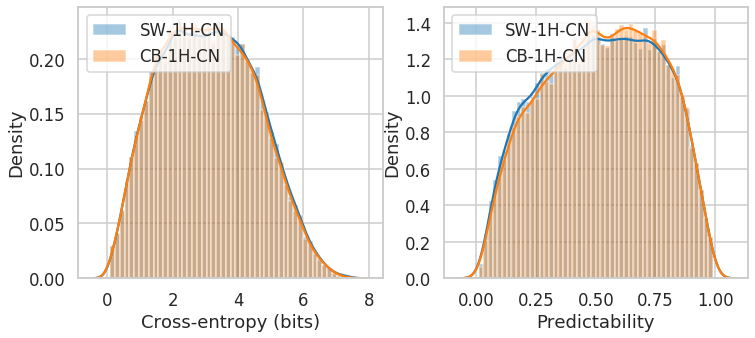

In [271]:
CE_v6 = compare_v6.plot_histogram(l=12,w=5)

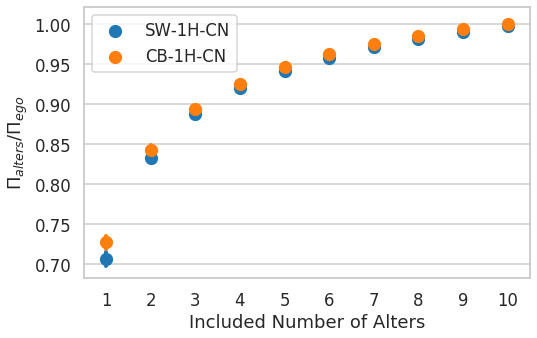

In [272]:
RCCP_alters_errorbar_v6 = compare_v6.plot_errorbar(target="RCCP alters", l=8,w=5)

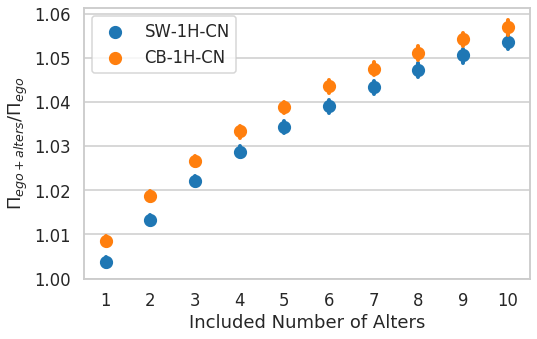

In [273]:
RCCP_ego_alters_errorbar_v6 = compare_v6.plot_errorbar(target='RCCP ego+alters', l=8,w=5)

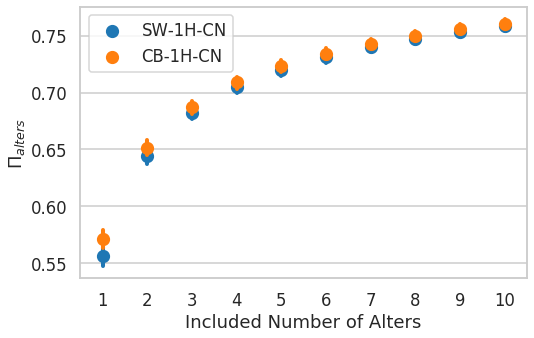

In [274]:
CCP_alters_errorbar_v6 = compare_v6.plot_errorbar(target='CCP alters', l=8,w=5)

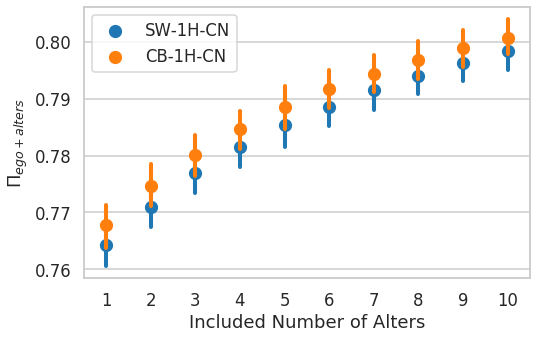

In [275]:
CCP_ego_alters_errorbar_v6 = compare_v6.plot_errorbar(target='CCP ego+alters', l=8,w=5)

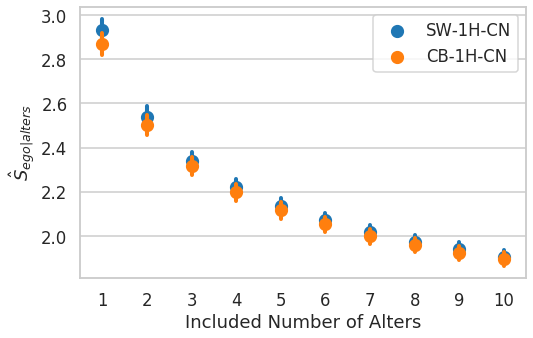

In [276]:
CCE_alters_errorbar_v6 = compare_v6.plot_errorbar(target='CCE alters', l=8,w=5)

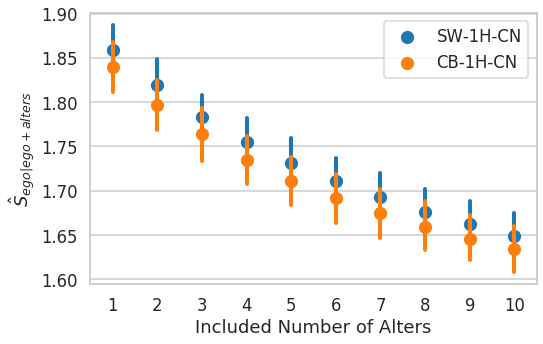

In [277]:
CCE_ego_alters_errorbar_v6 = compare_v6.plot_errorbar(target='CCE ego+alters', l=8,w=5)

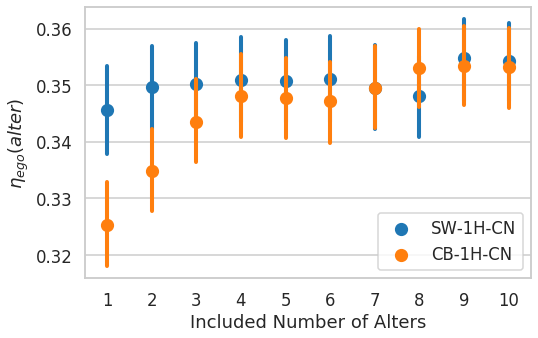

In [278]:
ODLR_errorbar_v6 = compare_v6.plot_errorbar(target='ODLR', l=8,w=5)

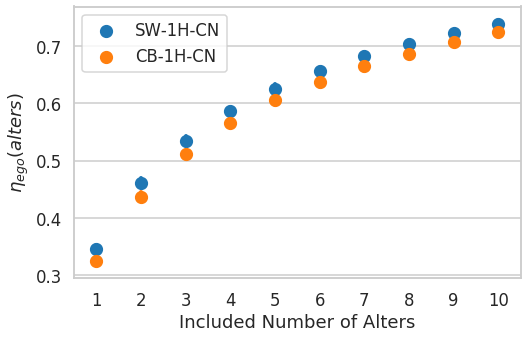

In [279]:
CODLR_errorbar_v6 = compare_v6.plot_errorbar(target='CODLR', l=8,w=5)

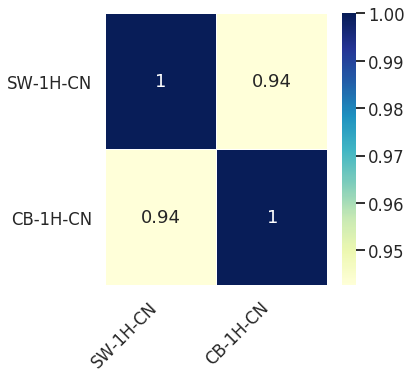

In [280]:
local_sim_v6 = compare_v6.plot_similarity(local=False, l=5,w=5)

In [281]:
compare_v6.statistics.to_csv('BZR_reciprocal_30_stats_no_call_history_vs_SW1.csv', index=False)

In [282]:
compare_v6.data.to_csv('BZR_reciprocal_30_no_call_common_top10_details_SW1.csv', index=False)